In [1]:
!pip install --user pycaret

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pycaret
# from imblearn.over_sampling import SMOTE

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/fraud_oracle.csv')

print(df.columns)
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
missing_summary = missing_values[missing_values > 0]
if missing_summary.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values detected:")
    print(missing_summary)

# Convert Yes-No columns to binary (1-0)
yes_no_columns = ['PoliceReportFiled', 'WitnessPresent']
df[yes_no_columns] = df[yes_no_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Convert ordinal categorical columns to numerical values
ordinal_mappings = {
    'AgeOfVehicle': {'less than 1': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
                     '5 years': 5, '6 years': 6, '7 years': 7, 'more than 7': 8},
    'AgeOfPolicyHolder': {'16 to 17': 16, '18 to 20': 19, '21 to 25': 23, '26 to 30': 28,
                          '31 to 35': 33, '36 to 40': 38, '41 to 50': 45, '51 to 65': 58,
                          'over 65': 70},
    'NumberOfCars': {'1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3, '5 to 8': 5, 'more than 8': 9},
    'NumberOfSuppliments': {'none': 0, '1 to 2': 1, '3 to 5': 3, 'more than 5': 5},
    'AddressChange_Claim': {'no change': 0, 'under 6 months': 1, '1 year': 2,
                             '2 to 3 years': 3, '4 to 8 years': 4, 'more than 8 years': 5}
}

for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

# Convert numerical columns to proper numeric types
numerical_cols = ['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Drop unnecessary columns if needed (e.g., PolicyNumber, RepNumber)
# df.drop(columns=['PolicyNumber', 'RepNumber'], inplace=True)

# Convert binary categorical columns ('Sex' and 'AgentType') to numerical 1-0 mapping
binary_mappings = {
    'Sex': {'Male': 1, 'Female': 0},
    'AgentType': {'Internal': 1, 'External': 0}
}

df.replace(binary_mappings, inplace=True)

df = pd.get_dummies(df, columns=['MaritalStatus'], drop_first=True)

df.to_csv("cleaned_df.csv",encoding = 'utf-8')

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType         

In [17]:
file_path = "/content/fraud_oracle.csv"
df = pd.read_csv(file_path)

df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
numerical_columns = df.select_dtypes(include=['int','float']).columns
numerical_columns = numerical_columns.drop('FraudFound_P')
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])
df_scaled.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,1.717545,Wednesday,Honda,Urban,Tuesday,Jan,-1.345408,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,-1.078658,Liability
1,Jan,0.164199,Wednesday,Honda,Urban,Monday,Jan,1.037295,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,-1.078658,Collision
2,Oct,1.717545,Friday,Honda,Urban,Thursday,Nov,-0.551174,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,-1.078658,Collision
3,Jun,-0.612473,Saturday,Toyota,Rural,Friday,Jul,-1.345408,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,-1.078658,Liability
4,Jan,1.717545,Monday,Honda,Urban,Tuesday,Feb,-0.551174,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,-1.078658,Collision


In [6]:
categorical_columns = df_scaled.select_dtypes(include=['object']).columns
df_scaled_encoded = df_scaled.copy()
df_scaled_encoded = pd.get_dummies(df_scaled_encoded, columns = categorical_columns, dtype = int)

df_scaled_encoded.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month_Apr,...,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,1.717545,-1.345408,-1.397554,0,-1.731938,0.764540,-2.450633,-1.329092,-1.078658,0,...,0,0,0,0,1,0,0,0,0,1
1,0.164199,1.037295,-0.434015,0,-1.731714,1.416743,-0.175298,1.350875,-1.078658,0,...,1,0,1,0,0,0,0,0,1,0
2,1.717545,-0.551174,0.529523,0,-1.731489,-0.322464,-0.175298,0.457553,-1.078658,0,...,1,0,1,0,0,0,0,0,1,0
3,-0.612473,-1.345408,1.863653,0,-1.731265,-0.974666,-0.175298,-0.435770,-1.078658,0,...,1,0,1,0,0,0,0,0,0,1
4,1.717545,-0.551174,-0.952844,0,-1.731040,-1.192067,-0.175298,-1.329092,-1.078658,0,...,1,0,1,0,0,0,0,0,1,0


In [13]:
from pycaret.classification import *
s = setup(df_scaled_encoded, target = 'FraudFound_P', session_id = 123)

,Description,Value
0,Session id,123
1,Target,FraudFound_P
2,Target type,Binary
3,Original data shape,"(15420, 149)"
4,Transformed data shape,"(15420, 149)"
5,Transformed train set shape,"(10794, 149)"
6,Transformed test set shape,"(4626, 149)"
7,Numeric features,148
8,Preprocess,True
9,Imputation type,simple


In [7]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [8]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [9]:
# init setup on exp
exp.setup(df_scaled_encoded, target = 'FraudFound_P', session_id = 123)

,Description,Value
0,Session id,123
1,Target,FraudFound_P
2,Target type,Binary
3,Original data shape,"(15420, 149)"
4,Transformed data shape,"(15420, 149)"
5,Transformed train set shape,"(10794, 149)"
6,Transformed test set shape,"(4626, 149)"
7,Numeric features,148
8,Preprocess,True
9,Imputation type,simple


In [14]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9547,0.9630,0.3610,0.7558,0.4858,0.4654,0.5017,0.5850
lightgbm,Light Gradient Boosting Machine,0.9477,0.9400,0.1674,0.8006,0.2740,0.2591,0.3485,1.2250
gbc,Gradient Boosting Classifier,0.9427,0.8754,0.0481,0.9167,0.0906,0.0853,0.1988,3.0500
rf,Random Forest Classifier,0.9406,0.8418,0.0155,0.6000,0.0299,0.0273,0.0870,1.3460
et,Extra Trees Classifier,0.9405,0.8305,0.0247,0.5500,0.0469,0.0422,0.1042,1.7560
svm,SVM - Linear Kernel,0.9402,0.7442,0.0031,0.1500,0.0061,0.0054,0.0193,0.4280
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0800
ridge,Ridge Classifier,0.9401,0.7967,0.0000,0.0000,0.0000,-0.0002,-0.0008,0.1040
lr,Logistic Regression,0.9400,0.7992,0.0154,0.3917,0.0295,0.0257,0.0675,0.9760
knn,K Neighbors Classifier,0.9363,0.6623,0.0232,0.2004,0.0412,0.0298,0.0496,0.4080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## class imbalance issue

In [15]:
best

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

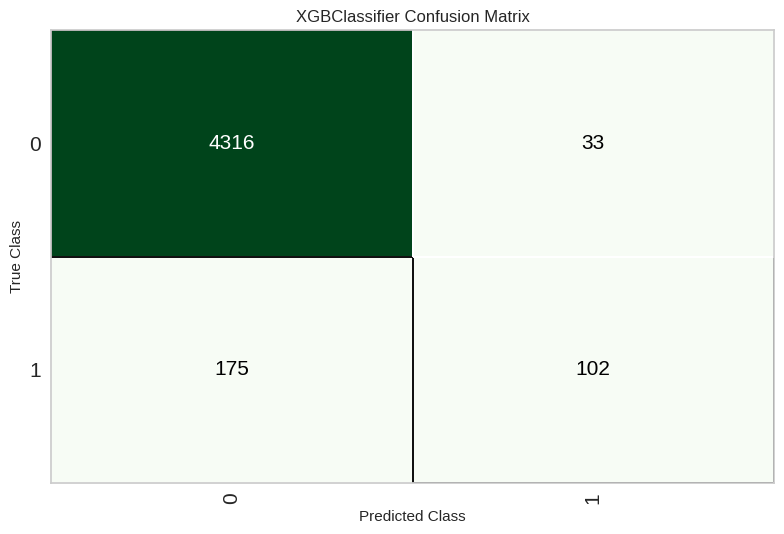

In [16]:
plot_model(best, plot = 'confusion_matrix')